### Q1

In [40]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [41]:
delivery = pd.read_csv('delivery_time.csv')
delivery.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [42]:
#EDA
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [43]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [44]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [45]:
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

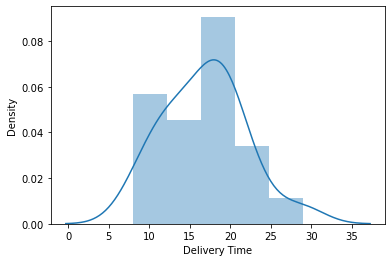

In [46]:
sns.distplot(delivery['Delivery Time'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

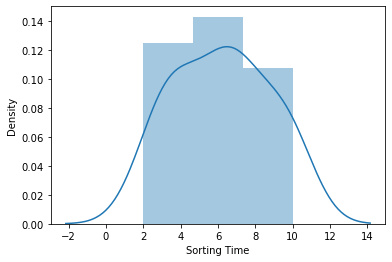

In [47]:
# distribution analysis
sns.distplot(delivery['Sorting Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

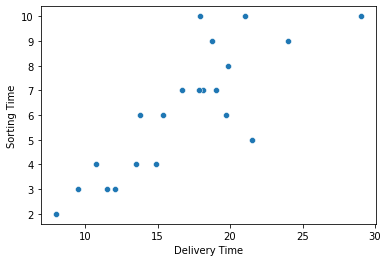

In [48]:
sns.scatterplot(x='Delivery Time',y='Sorting Time',data=delivery)

In [49]:
# renaming the columns 
delivery=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery.head(5)

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [50]:
model = smf.ols('np.log(delivery_time) ~ np.log(sorting_time)',data=delivery).fit()

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

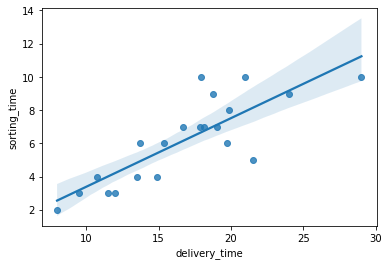

In [51]:
sns.regplot(x= delivery.delivery_time,y=delivery.sorting_time)

In [52]:
model.params

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64

In [53]:
model.tvalues,model.pvalues

(Intercept               13.085552
 np.log(sorting_time)     8.024484
 dtype: float64,
 Intercept               5.921137e-11
 np.log(sorting_time)    1.601539e-07
 dtype: float64)

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 26 Aug 2022   Prob (F-statistic):           1.60e-07
Time:                           13:11:43   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# data prediction 
data = pd.Series([7,9,4,6])
data

0    7
1    9
2    4
3    6
dtype: int64

In [56]:
data_pred = pd.DataFrame(data,columns=['sorting_time'])
data_pred

,sorting_time
0,7
1,9
2,4
3,6


In [57]:
model.predict (data_pred)

0    2.904712
1    3.054878
2    2.570329
3    2.812603
dtype: float64

In [58]:
#manual confirmation
# for sorting_time = 7
delivery_time = (6.582734) + (1.649020)*(7)
delivery_time


18.125874

### Q2

In [59]:
salary = pd.read_csv('Salary_Data.csv')
salary.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [60]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [61]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [62]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [63]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

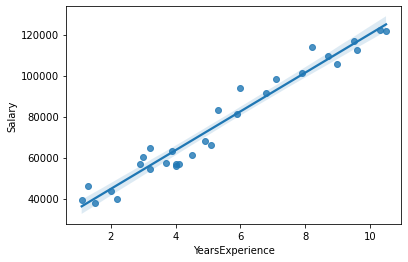

In [64]:
sns.regplot(x=salary.YearsExperience,y= salary.Salary)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

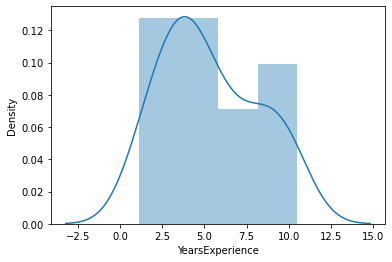

In [65]:
sns.distplot(salary.YearsExperience)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

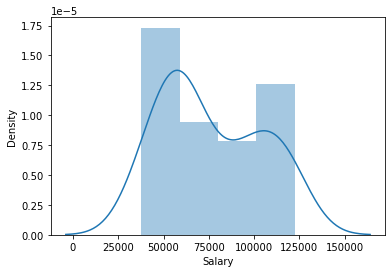

In [66]:
sns.distplot(salary.Salary)

In [67]:
#model builting
model_salary = smf.ols('Salary~YearsExperience',data=salary).fit()

In [68]:
model_salary.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [69]:
model_salary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        13:11:44   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
data_year = pd.Series([3,5,6,2])
data_year

0    3
1    5
2    6
3    2
dtype: int64

In [71]:
data_pred_salary = pd.DataFrame(data_year,columns=['YearsExperience'])

In [72]:
model_salary.predict(data_pred_salary)

0    54142.087163
1    73042.011806
2    82491.974127
3    44692.124842
dtype: float64

In [73]:
#manual prediction for YearsExperience = 3
salary_pred = (25792.200199) + (9449.962321)*(3)
salary_pred

54142.087162